# Sprint 15: Series de Tiempo

<h1>📊 Parte 1</h1>

<h2>🎯 Objetivos de la sesión</h2>
<ul>
  <li>Comprender el concepto de serie de tiempo y sus principales componentes.</li>
  <li>Distinguir entre tendencia, estacionalidad, ciclo y ruido.</li>
  <li>Aplicar operaciones básicas con datos temporales en Pandas.</li>
  <li>Explorar técnicas de suavizado como la media móvil.</li>
  <li>Analizar la autocorrelación como paso previo a la modelación predictiva.</li>
</ul>

<h2>🗓️ Agenda</h2>
<ol>
  <li>Introducción a las series de tiempo.</li>
  <li>Componentes: tendencia, estacionalidad, ciclo y ruido.</li>
  <li>Medidas de tendencia y dispersión (media móvil, desviación estándar).</li>
  <li>Autocorrelación e interpretación.</li>
  <li>Manipulación y visualización de series con Pandas.</li>
  <li>Preparación para modelos predictivos (ARIMA, SARIMA, Prophet) en la siguiente sesión.</li>
</ol>

<hr>

<h2>1. Concepto de Serie de Tiempo</h2>
<p>
Una <strong>serie de tiempo</strong> es una secuencia de observaciones registradas a intervalos regulares de tiempo (diarios, mensuales, anuales, etc.). 
Permiten analizar cómo cambian los valores a lo largo del tiempo y detectar patrones como <em>tendencias</em>, <em>ciclos</em> o <em>estacionalidad</em>.
</p>

<h2>2. Componentes de una Serie de Tiempo</h2>

<ul>
  <li><strong>Tendencia:</strong> Comportamiento general de la serie a largo plazo. Indica si los valores aumentan, disminuyen o se mantienen estables.</li>

<img src="https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_Untitled_1_1581660823_1593445499.png" alt="Componentes de una serie de tiempo" width="600">


  <li><strong>Estacionalidad:</strong> Patrones que se repiten periódicamente en intervalos regulares (por ejemplo, ventas que suben en diciembre).</li>

<img src="https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_stationary_stochastic_process_1581660680_1593445436.jpg" alt="Componentes de una serie de tiempo" width="600">

  <li><strong>Ciclo:</strong> Fluctuaciones que ocurren en horizontes más largos que la estacionalidad, a menudo asociadas a fenómenos económicos.</li>
  <li><strong>Ruido:</strong> Variaciones aleatorias que no siguen ningún patrón sistemático y reflejan la incertidumbre o el error en los datos.</li>
</ul>


<img src="https://antonio-richaud.com/blog/imagenes/archivo/34-descomposicion-de-series-temporales/D02.png" alt="Componentes de una serie de tiempo" width="600">
 

<h2>Video explicativo sobre componentes de series de tiempo</h2>

<p>Fuente: <a href="https://www.youtube.com/embed/QDPdHFwjNDU?si=s3ep7z97-53PDedD">YouTube</a></p>

<h2>3. Medidas de tendencia y dispersión</h2>

<ul>
  <li><strong>Media móvil (rolling mean):</strong> Suaviza las fluctuaciones de corto plazo al promediar los valores en una ventana móvil.</li>
  <li><strong>Desviación estándar móvil:</strong> Mide la variabilidad local de los datos en ventanas móviles, ayudando a identificar períodos de mayor volatilidad.</li>
</ul>

<h2>4. Autocorrelación</h2>
<p>
La <strong>autocorrelación</strong> mide el grado en que los valores de una serie se relacionan con sus propios valores pasados. 
Una alta autocorrelación en ciertos rezagos (lags) indica que los valores pasados influyen en los futuros, lo cual es esencial para modelar y predecir series de tiempo.
</p>

<h2>5. Contextos de uso</h2>
<ul>
  <li>Finanzas: precios de acciones, tasas de interés, inflación.</li>
  <li>Economía: PIB, desempleo, producción industrial.</li>
  <li>Negocios: ventas, tráfico web, demanda de productos.</li>
  <li>Ciencias: temperatura, niveles de contaminación, caudales de ríos.</li>
</ul>

<hr>

<h1>🧮 Ejemplo práctico con una Serie de Tiempo real</h1>

<h2>🎯 Objetivo</h2>
<p>
Aprender a cargar, preparar y analizar una serie de tiempo con <strong>Pandas</strong>, aplicando:
</p>
<ul>
  <li>Conversión de fechas a formato datetime.</li>
  <li>Configuración de índice temporal.</li>
  <li>Re-muestreo (<code>resample</code>) por diferentes frecuencias.</li>
  <li>Visualización general de la serie.</li>
  <li>Descomposición en tendencia, estacionalidad y residuo.</li>
  <li>Cálculo de media y desviación móvil.</li>
</ul>
<hr>

In [98]:
# 1. Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 2. Cargar el dataset
df = pd.read_csv('https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/Month_Value.csv')
print("Primeras filas:")
df.head()


Primeras filas:


,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [99]:
# 3. Convertir la columna de fecha a datetime
# Suponiendo que la columna se llama 'Month' o 'Date'
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')


# Verificar formato
print(df.dtypes)


Period                                      datetime64[ns]
Revenue                                            float64
Sales_quantity                                     float64
Average_cost                                       float64
The_average_annual_payroll_of_the_region           float64
dtype: object


In [100]:
# 4. Establecer la columna de fecha como índice
df = df.set_index('Period').sort_index()
df.head()



,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0


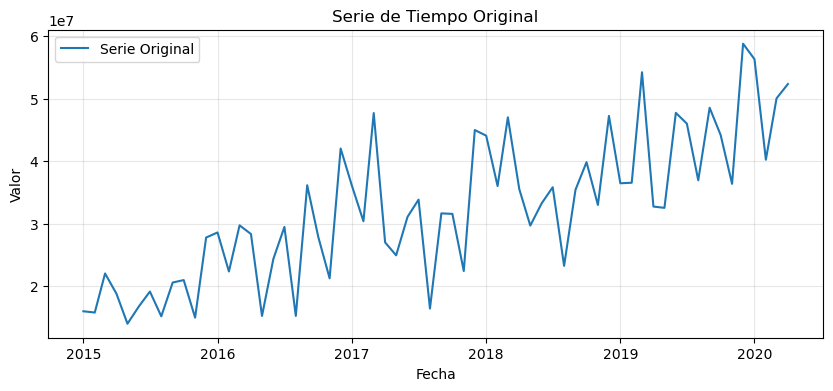

In [101]:
# 5. Visualizar la serie original
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Revenue'], label='Serie Original')
plt.title('Serie de Tiempo Original')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [102]:
# 6. Re-muestreo (resampling)
# Convertir la frecuencia según la necesidad: diaria, mensual, trimestral, anual, etc.

df_quarterly = df.resample('QE').mean() # Re-muestreo trimestral
df_semiannual = df.resample('2QE').mean() # Re-muestreo semestral


print("Mensual:", df_semiannual.shape)
print("Trimestral:", df_quarterly.shape)


Mensual: (17, 4)
Trimestral: (32, 4)


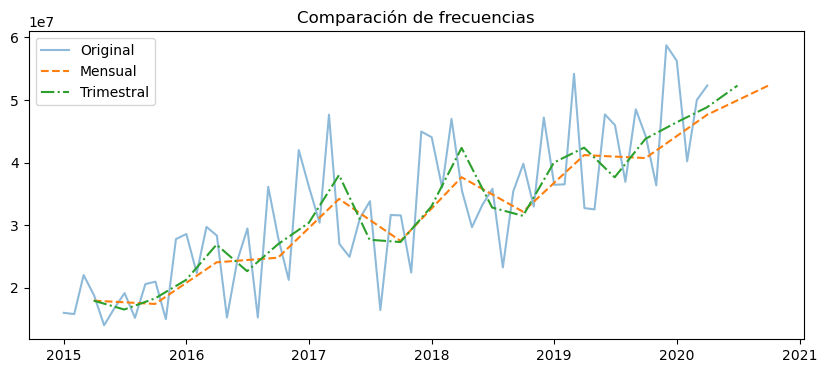

In [103]:
# 7. Graficar los re-muestreos
plt.figure(figsize=(10,4))
plt.plot(df['Revenue'], label='Original', alpha=0.5)
plt.plot(df_semiannual['Revenue'], label='Mensual', linestyle='--')
plt.plot(df_quarterly['Revenue'], label='Trimestral', linestyle='-.')
plt.title('Comparación de frecuencias')
plt.legend()
plt.show()


<Axes: xlabel='Period'>

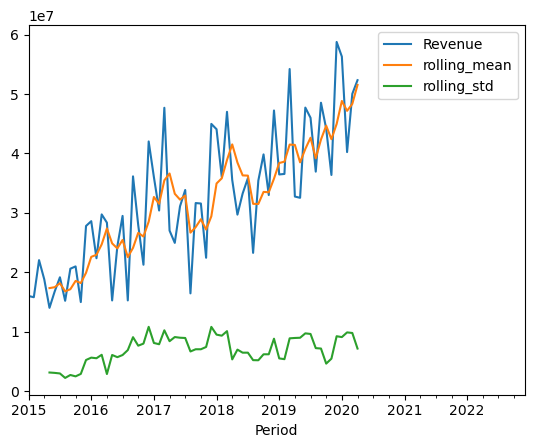

In [110]:
df.sort_index(inplace=True)
df['rolling_mean'] = df['Revenue'].rolling(5).mean()
df['rolling_std'] = df['Revenue'].rolling(5).std()

data= df[['Revenue','rolling_mean','rolling_std']]
data.plot()

In [111]:
data

,Revenue,rolling_mean,rolling_std
Period,,,
2015-01-01,1.601007e+07,NaN,NaN
2015-02-01,1.580759e+07,NaN,NaN
2015-03-01,2.204715e+07,NaN,NaN
2015-04-01,1.881458e+07,NaN,NaN
2015-05-01,1.402148e+07,1.734017e+07,3.140907e+06
...,...,...,...
2022-08-01,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN


<Axes: title={'center': 'Tendencia'}, xlabel='Period'>

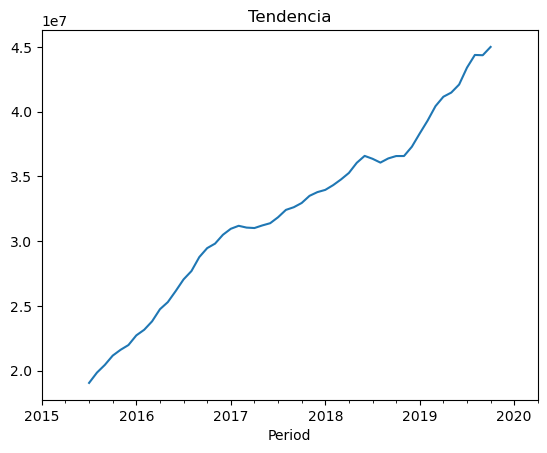

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data['Revenue'].dropna())

decomposed.trend.plot(title='Tendencia')

<Axes: title={'center': 'Estacionalidad'}, xlabel='Period'>

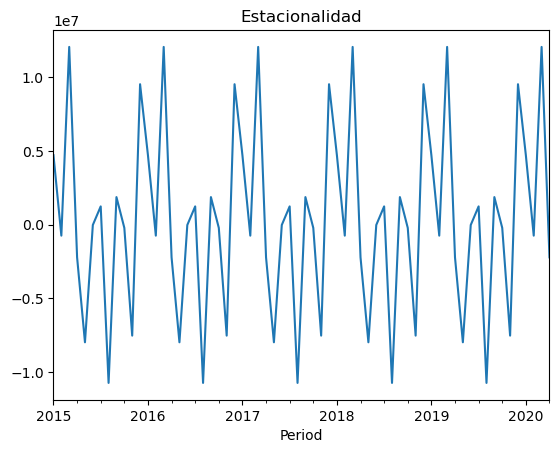

In [115]:
decomposed.seasonal.plot(title='Estacionalidad')

<Axes: title={'center': 'Residuales'}, xlabel='Period'>

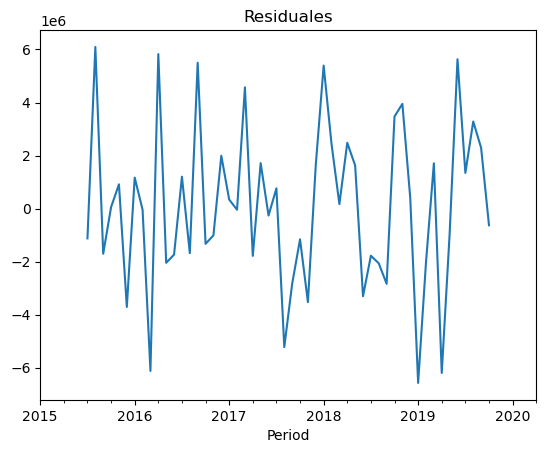

In [116]:
decomposed.resid.plot(title='Residuales')

In [119]:
from statsmodels.tsa.stattools import adfuller


df['diff_1'] = df['Revenue'] - df['Revenue'].shift(1)
#df['diff_1'] = df['Value'].diff() 

result = adfuller(df['diff_1'].dropna())
print(f'Estadístico ADF: {result[0]}')
print(f'p-valor: {result[1]}')

if result[1] < 0.05:
    print("La serie es estacionaria")
else:
    print("La serie no es estacionaria")


Estadístico ADF: -5.6043301128295075
p-valor: 1.2441377995537974e-06
La serie es estacionaria


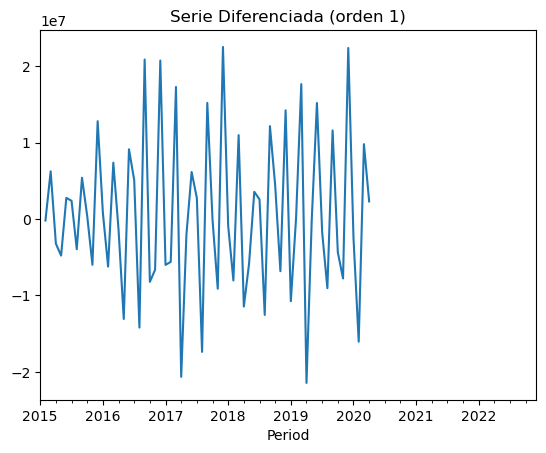

In [118]:
df['diff_1'].plot(title='Serie Diferenciada (orden 1)')
plt.show()

## Ejercicio:

En grupos, encuentren en Kaggle u otra fuente una serie de tiempo que les interese (ventas, clima, finanzas, etc.).
Carguen los datos en un DataFrame de Pandas y realicen los pasos realizados en este ejemplo práctico.

¿Que resultados obtuvieron? ¿Qué desafíos enfrentaron?
¿Cómo clasificarían la serie en términos de tendencia, estacionalidad, ciclo y ruido?